# 1. Exploración y visualización preliminar de los datos
Importar librerias necesarias, cargar los datos y obtener información.

In [4]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.9 MB 34.2 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=400139 sha256=0ce92361626f65af4fb8c380c86184f2b3ea4a740db65a9fe0f937ab17406d03
  Stored in directory: /tmp/pip-ephem-wheel-cache-bj95odrf/wheels/85/5d/45/8a23c7b77d2023fbc37490b8902f7fdeff5614f65d6e08b6c4
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9309c

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import numpy as np
import seaborn as sns
import glob

# Configuración de Matplotlib para mostrar gráficas
%matplotlib inline

## Cargar y combinar archivos CSV
Cargar los archivos y combinar la información de todos los años en una sola fuente.

In [8]:
# Subir archivos
from google.colab import files

# Cargar archivos del reporte
uploaded = files.upload()

# Combinar
all_data = []

for filename in uploaded.keys():
    # Tomar el año del nombre del archivo
    year = int(''.join(filter(str.isdigit, filename)))
    df = pd.read_csv(filename)
    df['Year'] = year

    # Estandarizar nombres de columnas
    rename_dict = {
        'Happiness.Score': 'Happiness Score',
        'Happiness.Rank': 'Happiness Rank',
        'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
        'Health..Life.Expectancy.': 'Health (Life Expectancy)',
        'Trust..Government.Corruption.': 'Trust (Government Corruption)',
        'Dystopia.Residual': 'Dystopia Residual'
    }
    df.rename(columns=rename_dict, inplace=True)

    all_data.append(df)

# Concatenar los años
combined_df = pd.concat(all_data, ignore_index=True)


Saving 2017.csv to 2017 (2).csv
Saving 2016.csv to 2016 (2).csv
Saving 2015.csv to 2015 (2).csv
Saving 2018.csv to 2018 (2).csv
Saving 2019.csv to 2019 (2).csv


## Información
Utilizar el método `.info()` para obtener la información incluyendo el número de entradas, las columnas, los tipos de datos y los valores no nulos.

In [9]:
# Obtener info
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Happiness Rank                 470 non-null    float64
 2   Happiness Score                470 non-null    float64
 3   Whisker high                   155 non-null    float64
 4   Whisker low                    155 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Generosity                     782 non-null    float64
 10  Trust (Government Corruption)  781 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Year                           782 non-null    int

## Descripción de los resultados de `.info()`

La salida del método `.info()` proporciona la siguiente información:

1. **Número de entradas (filas):** 782
2. **Número de columnas:** 25
3. **Nombres de las columnas y sus tipos de datos:**
- `Overall rank`: float
- `Country or region`: object
- `Score`: float
- `GDP per capita`: float
- `Social support`: float
- `Healthy life expectancy`: float
- `Freedom to make life choices`: float
- `Generosity`: float
- `Perceptions of corruption`: float
- `Year`: int
- `Country`: object
- `Happiness Rank`: float
- `Happiness Score`: float
- `Whisker.high`: float
- `Whisker.low`: float
- `Economy (GDP per Capita)`: float
- `Family`: float
- `Health (Life Expectancy)`: float
- `Freedom`: float
- `Trust (Government Corruption)`: float
- `Dystopia Residual`: float
- `Region`: object
- `Lower Confidence Interval`: float
- `Upper Confidence Interval`: float
- `Standard Error`: float

## Visualización de la estructura
Visualizar la estructura usando los métodos `.head()`, `.tail()` y `.sample()` para tener una idea de los datos contenidos.

In [10]:
# Obtener las primeras filas
combined_df.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,...,Dystopia Residual,Year,Region,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Overall rank,Country or region,Score,Social support
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,...,2.277027,20172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,...,2.313707,20172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,2.322715,20172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,...,2.276716,20172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,2.430182,20172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Obtener las últimas filas
combined_df.tail()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,...,Dystopia Residual,Year,Region,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Overall rank,Country or region,Score,Social support
777,NaN,NaN,NaN,NaN,NaN,0.359,NaN,0.614,0.555,0.217,...,NaN,20192,NaN,NaN,NaN,NaN,152.0,Rwanda,3.334,0.711
778,NaN,NaN,NaN,NaN,NaN,0.476,NaN,0.499,0.417,0.276,...,NaN,20192,NaN,NaN,NaN,NaN,153.0,Tanzania,3.231,0.885
779,NaN,NaN,NaN,NaN,NaN,0.350,NaN,0.361,0.000,0.158,...,NaN,20192,NaN,NaN,NaN,NaN,154.0,Afghanistan,3.203,0.517
780,NaN,NaN,NaN,NaN,NaN,0.026,NaN,0.105,0.225,0.235,...,NaN,20192,NaN,NaN,NaN,NaN,155.0,Central African Republic,3.083,0.000
781,NaN,NaN,NaN,NaN,NaN,0.306,NaN,0.295,0.010,0.202,...,NaN,20192,NaN,NaN,NaN,NaN,156.0,South Sudan,2.853,0.575


In [14]:
# Obtener una muestra aleatoria
combined_df.sample(5)

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,...,Dystopia Residual,Year,Region,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Overall rank,Country or region,Score,Social support
54,South Korea,55.0,5.838,5.922559,5.753441,1.401678,1.128274,0.900214,0.257922,0.206674,...,1.880378,20172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,Malaysia,47.0,6.005,NaN,NaN,1.251420,0.880250,0.623660,0.390310,0.414740,...,2.353840,20162,Southeastern Asia,5.921,6.089,NaN,NaN,NaN,NaN,NaN
452,Uganda,141.0,3.931,NaN,NaN,0.211020,1.132990,0.338610,0.457270,0.290660,...,1.427660,20152,Sub-Saharan Africa,NaN,NaN,0.04317,NaN,NaN,NaN,NaN
478,NaN,NaN,NaN,NaN,NaN,1.355000,NaN,0.913000,0.659000,0.285000,...,NaN,20182,NaN,NaN,NaN,NaN,9.0,Sweden,7.314,1.501
267,Namibia,113.0,4.574,NaN,NaN,0.932870,0.703620,0.347450,0.486140,0.077950,...,1.921980,20162,Sub-Saharan Africa,4.374,4.774,NaN,NaN,NaN,NaN,NaN


## Visualizar variables específicas
Utilizar `value_counts(dropna=False)` para visualizar la distribución de las variables `Country`, `Region`, `Year`.

In [15]:
# Visualizar las distribuciones de las variables
country_counts = combined_df['Country'].value_counts(dropna=False)
region_counts = combined_df['Region'].value_counts(dropna=False)
year_counts = combined_df['Year'].value_counts(dropna=False)

# Mostrar los resultados
country_counts, region_counts, year_counts

(Country
 NaN                  312
 China                  4
 Iceland                3
 Switzerland            3
 Norway                 3
                     ... 
 Somaliland Region      1
 Oman                   1
 Somaliland region      1
 Swaziland              1
 Djibouti               1
 Name: count, Length: 166, dtype: int64,
 Region
 NaN                                467
 Sub-Saharan Africa                  78
 Central and Eastern Europe          58
 Latin America and Caribbean         46
 Western Europe                      42
 Middle East and Northern Africa     39
 Southeastern Asia                   18
 Southern Asia                       14
 Eastern Asia                        12
 North America                        4
 Australia and New Zealand            4
 Name: count, dtype: int64,
 Year
 20152    158
 20162    157
 20182    156
 20192    156
 20172    155
 Name: count, dtype: int64)

## Descripción de las variables
Utilizar el método `.describe()` para obtener una descripción estadística de las variables numéricas, y utilizar `.describe(include=['0'])` para obtener una descripción de las variables categóricas.

In [16]:
# Descripción de las variables numéricas
combined_df.describe()

,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Overall rank,Score,Social support
count,470.000000,470.000000,155.000000,155.000000,782.000000,470.000000,782.000000,782.000000,782.000000,781.000000,470.000000,782.000000,157.000000,157.000000,158.000000,312.000000,312.000000,312.000000
mean,78.829787,5.370728,5.452326,5.255713,0.916047,0.990347,0.612416,0.411091,0.218576,0.125436,2.092717,20171.936061,5.282395,5.481975,0.047885,78.500000,5.391506,1.211026
std,45.281408,1.136998,1.118542,1.145030,0.407340,0.318707,0.248309,0.152880,0.122321,0.105816,0.565772,14.173644,1.148043,1.136493,0.017146,45.104737,1.114631,0.300310
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,20152.000000,2.732000,3.078000,0.018480,1.000000,2.853000,0.000000
25%,40.000000,4.509000,4.608172,4.374955,0.606500,0.793000,0.440183,0.309768,0.130000,0.054000,1.737975,20162.000000,4.327000,4.465000,0.037268,39.750000,4.514250,1.055750
50%,79.000000,5.282500,5.370032,5.193152,0.982205,1.025665,0.647310,0.431000,0.201982,0.091000,2.094640,20172.000000,5.237000,5.419000,0.043940,78.500000,5.379500,1.265500
75%,118.000000,6.233750,6.194600,6.006527,1.236187,1.228745,0.808000,0.531000,0.278832,0.156030,2.455575,20182.000000,6.154000,6.434000,0.052300,117.250000,6.176000,1.457500
max,158.000000,7.587000,7.622030,7.479556,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.837720,20192.000000,7.460000,7.669000,0.136930,156.000000,7.769000,1.644000


In [17]:
# Descripción de las variables categóricas
combined_df.describe(include=['O'])

,Country,Region,Country or region
count,470,315,312
unique,165,10,160
top,China,Sub-Saharan Africa,Finland
freq,4,78,2


## Análisis de correlación y distribuciones
Analizar la correlación entre las variables numéricas y visualizar las distribuciones de las variables más importantes.

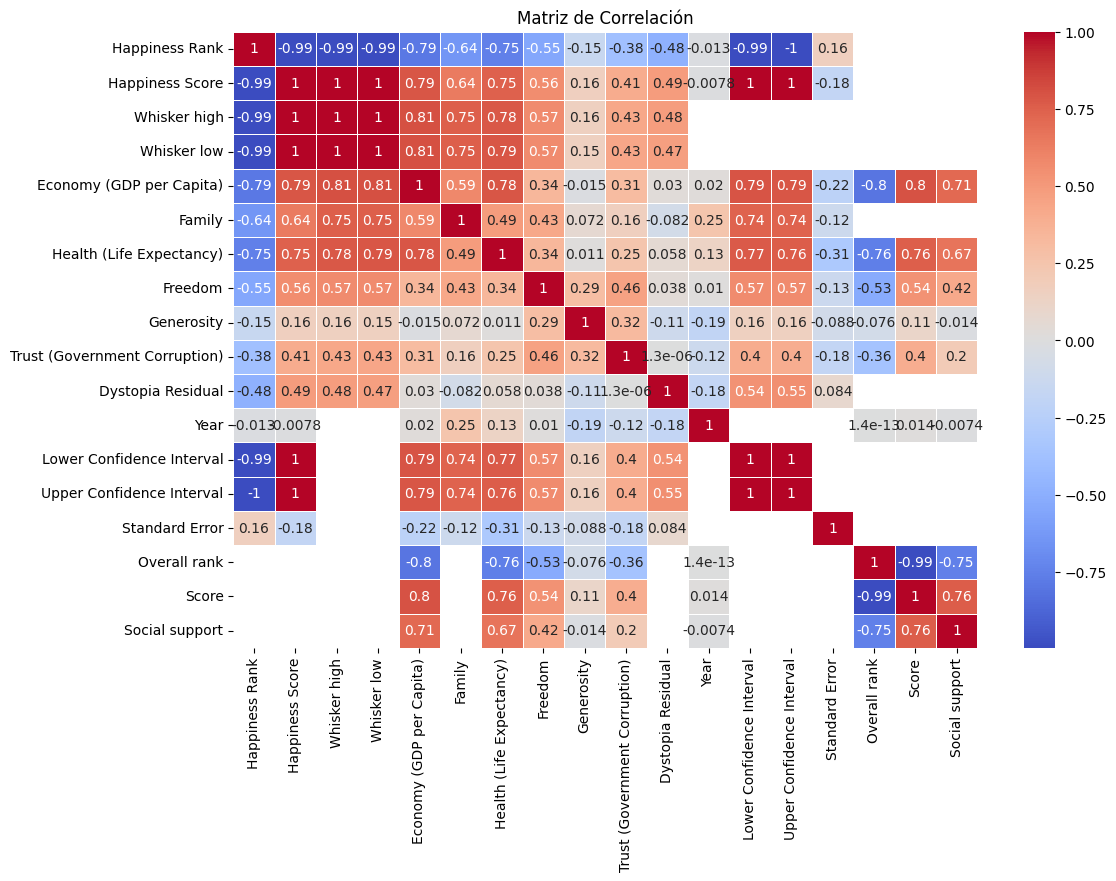

In [18]:
# Columnas numéricas
numeric_df = combined_df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Obtener la matriz de correlación
plt.figure(figsize=(12, 8))
plt.title("Matriz de Correlación")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## Visualización de distribuciones
Visualizar las distribuciones de las variables numéricas más importantes.

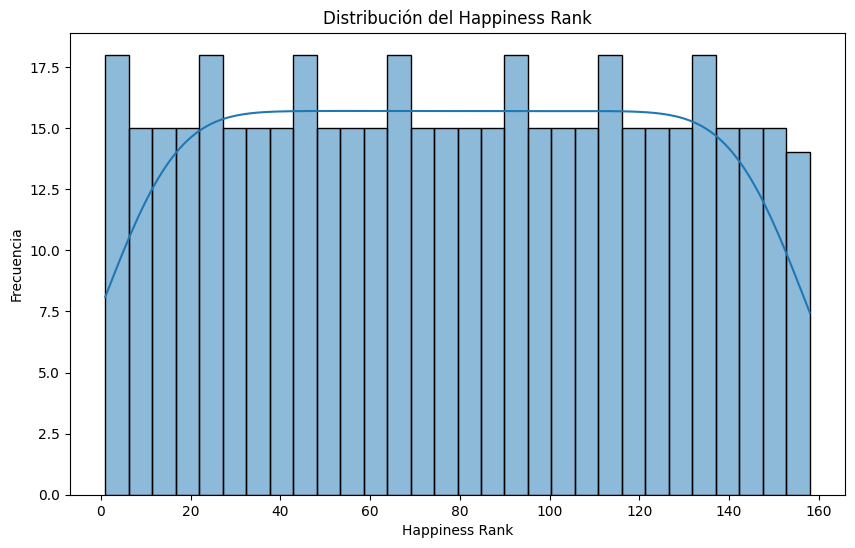

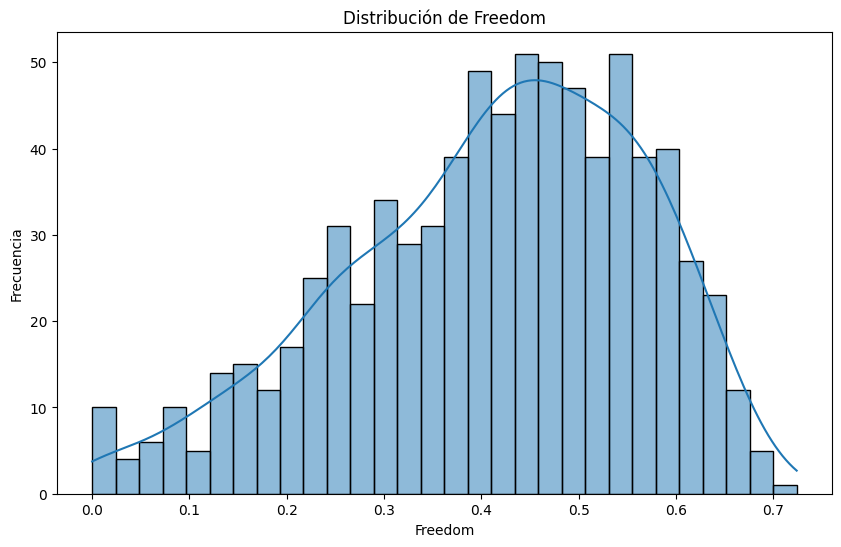

In [19]:
# Distribución del Happiness Rank
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Happiness Rank'], bins=30, kde=True)
plt.title('Distribución del Happiness Rank')
plt.xlabel('Happiness Rank')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de Freedom
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Freedom'], bins=30, kde=True)
plt.title('Distribución de Freedom')
plt.xlabel('Freedom')
plt.ylabel('Frecuencia')
plt.show()

Visualizar las distribuciones de las variables categóricas más importantes.

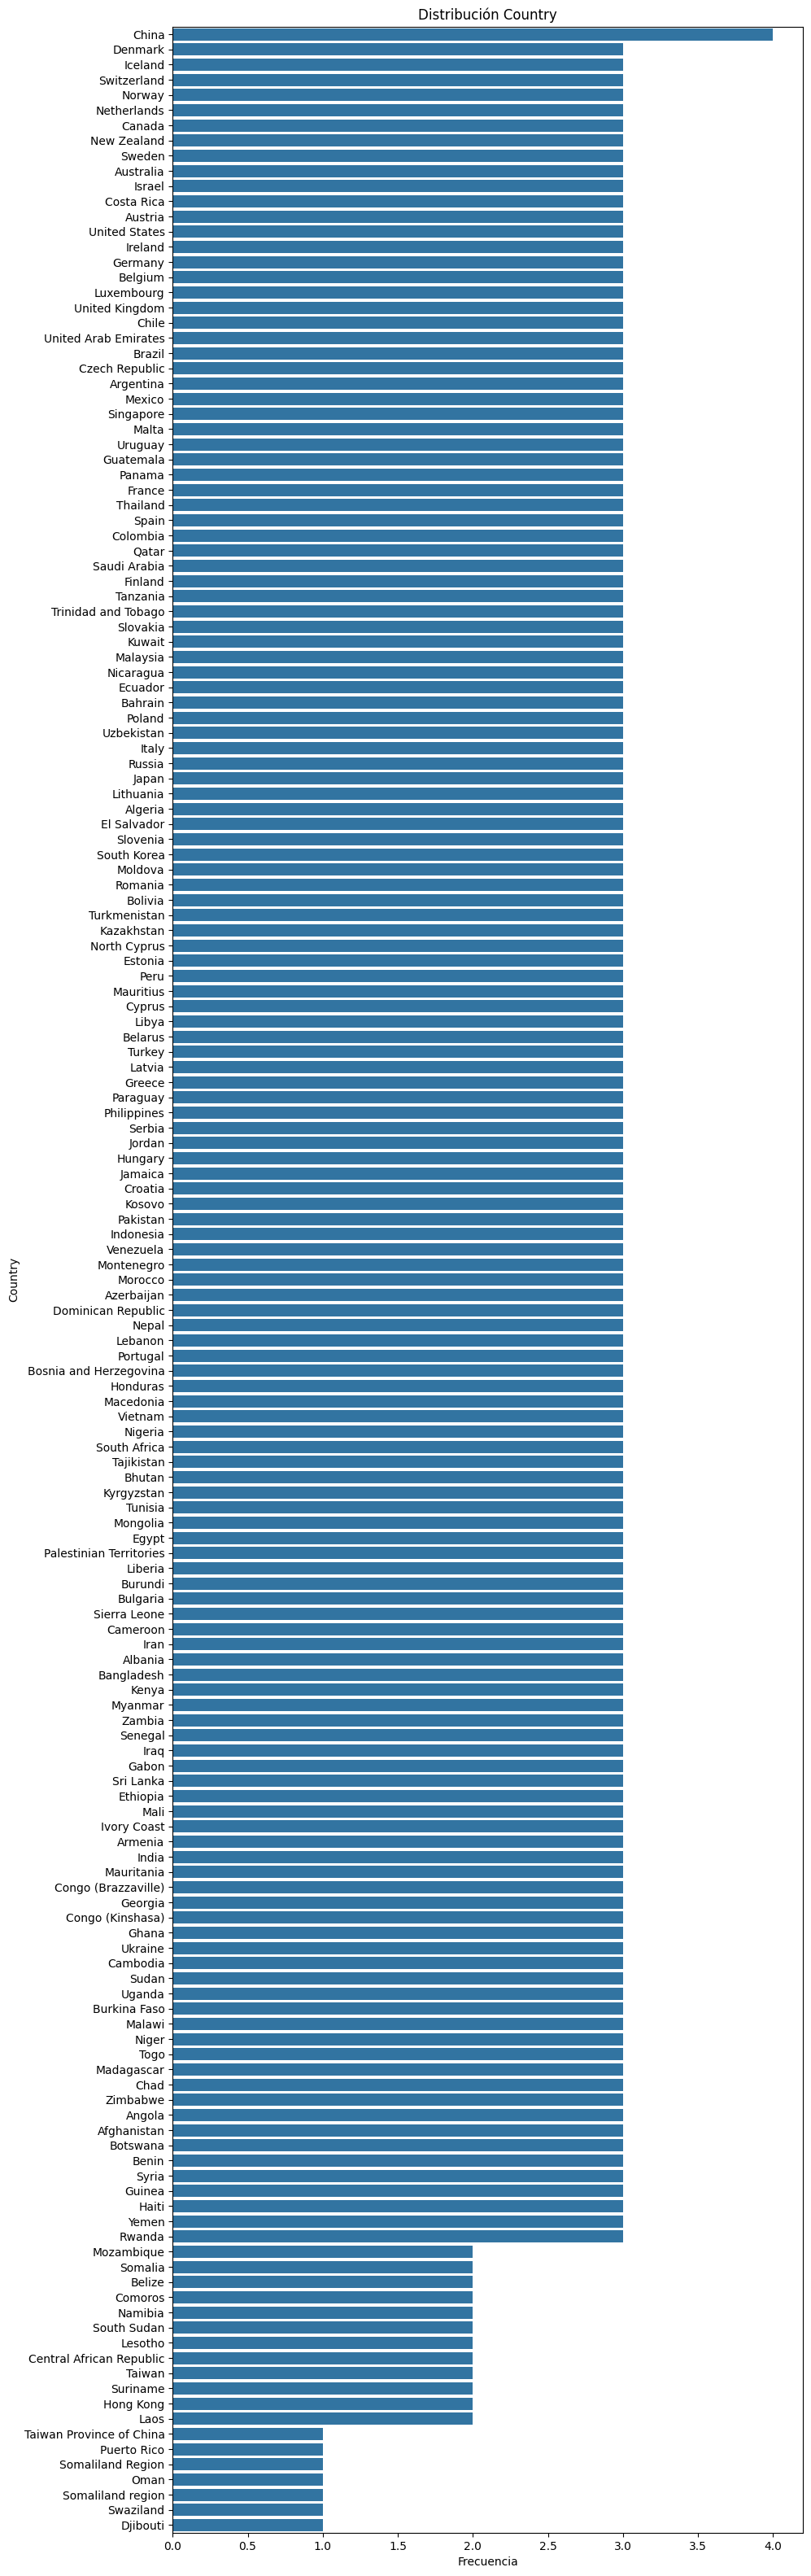

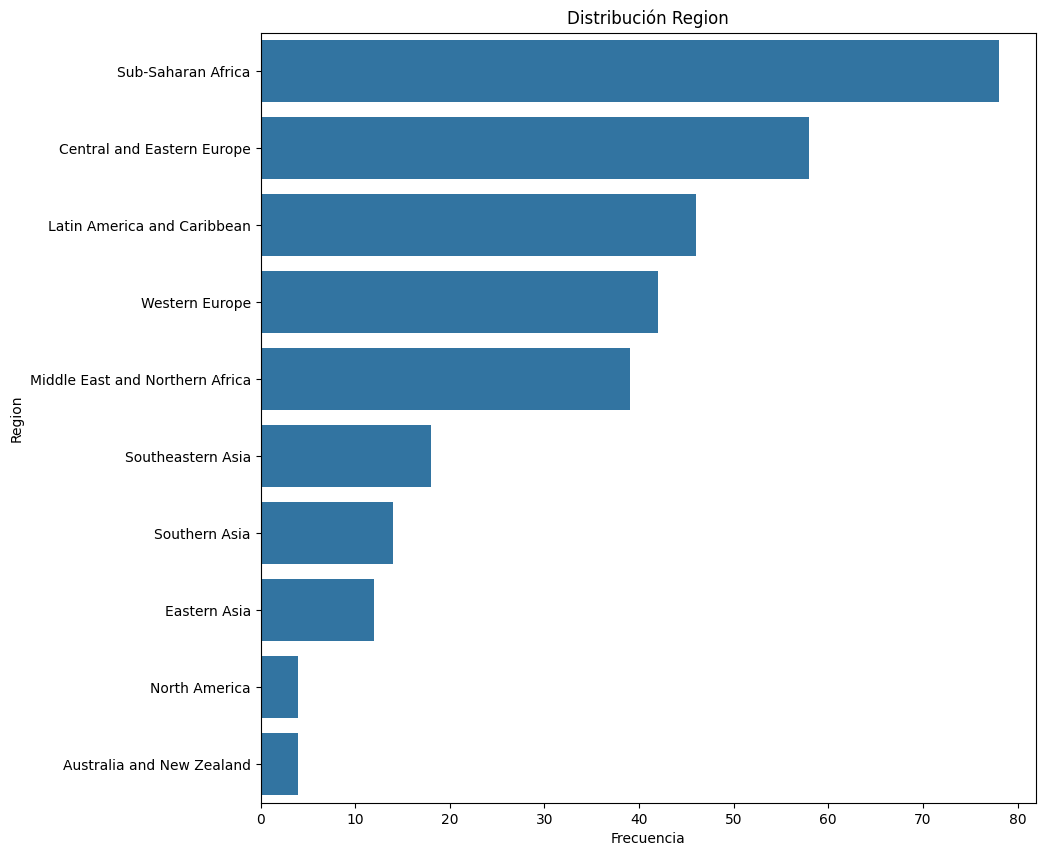

In [20]:
# Distribución Country
plt.figure(figsize=(10, 40))
sns.countplot(data=combined_df, y='Country', order=combined_df['Country'].value_counts().index)
plt.title('Distribución Country')
plt.xlabel('Frecuencia')
plt.ylabel('Country')
plt.show()

# Distribución Region
plt.figure(figsize=(10, 10))
sns.countplot(data=combined_df, y='Region', order=combined_df['Region'].value_counts().index)
plt.title('Distribución Region')
plt.xlabel('Frecuencia')
plt.ylabel('Region')
plt.show()

## Perfilado de Datos
Utilizar la librería `sweetviz` para obtener un análisis detallado e identificar anomalías, valores faltantes, distribuciones y correlaciones.

In [22]:
!pip install sweetviz